## Neural Networks

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [3]:
cols=["flength","fwidth","fsize","fconc","fconcl","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df=pd.read_csv("magic04.data",names=cols)
df.head()

flength    fwidth   fsize   fconc  fconcl     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [4]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [5]:
df['class']=(df["class"]=="g").astype(int)

In [6]:
train, valid, test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

C:\Users\kirolos\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [7]:
def scale_dataset(dataframe, oversample=False):
    x=dataframe[dataframe.columns[:-1]].values
    y=dataframe[dataframe.columns[-1]].values

    scaler=StandardScaler()
    x=scaler.fit_transform(x)
    
    if oversample:
        ros=RandomOverSampler()
        x,y=ros.fit_resample(x,y)

    data= np.hstack((x,np.reshape(y,(-1,1))))
    return data,x,y

In [8]:
train ,x_train, y_train =scale_dataset(train,oversample=True)
valid ,x_valid, y_valid =scale_dataset(valid,oversample=False)
test ,x_test, y_test =scale_dataset(test,oversample=False)

In [9]:
def plot_history(history):
    fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
    ax1.plot(history.history['loss'],label='loss')
    ax1.plot(history.history['val_loss'],label='val_loss')
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('binary crossentropy')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history.history['accuracy'],label='accuracy')
    ax2.plot(history.history['val_accuracy'],label='val_accuracy')
    ax2.set_xlabel('epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)
    plt.show()

In [10]:
def train_model(x_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs):
    nn_model=tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(32,activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1,activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),loss='binary_crossentropy',
                    metrics=['accuracy'])
    history= nn_model.fit( x_train,y_train, epochs=epochs,batch_size=batch_size,validation_split=0.2,verbose=0)
    return nn_model,history

C:\Users\kirolos\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16 nodes, dropout 0, learning rate 0.01, batch size 32


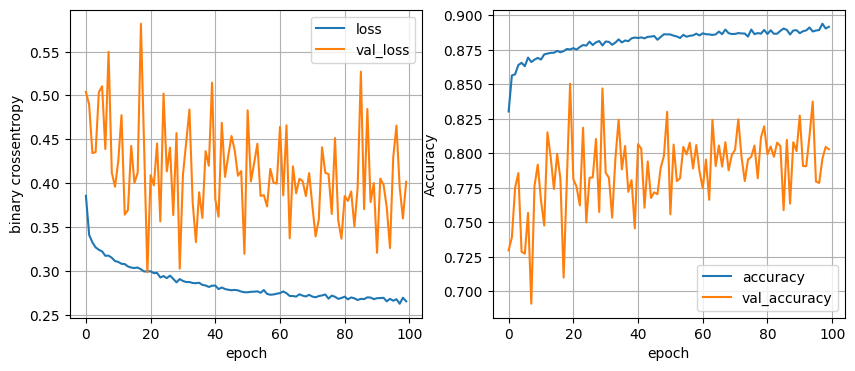

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.8706 - loss: 0.3459
[0.33909180760383606, 0.8654048442840576]
16 nodes, dropout 0, learning rate 0.01, batch size 64


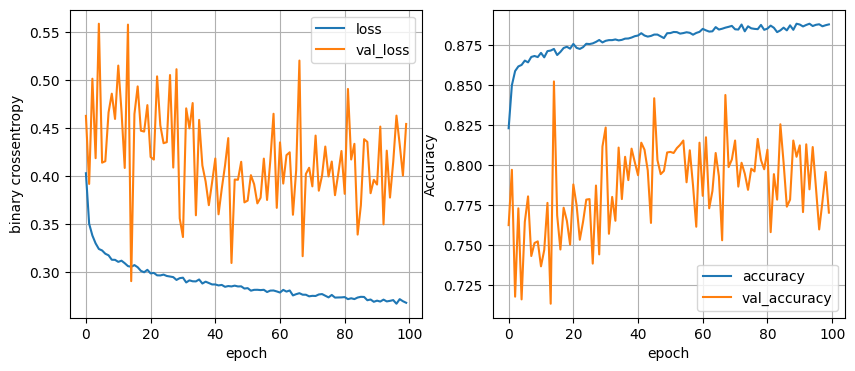

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - accuracy: 0.8685 - loss: 0.3459
[0.3360542356967926, 0.8661934733390808]
16 nodes, dropout 0, learning rate 0.01, batch size 128


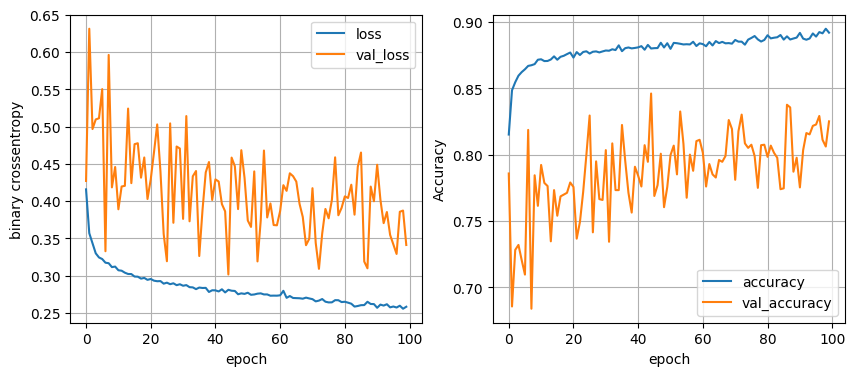

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.8775 - loss: 0.3248
[0.32622358202934265, 0.8735541701316833]
16 nodes, dropout 0, learning rate 0.005, batch size 32


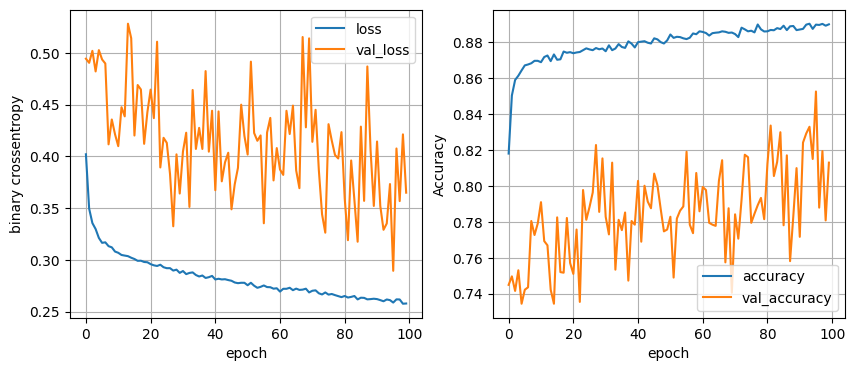

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8735 - loss: 0.3281
[0.33171597123146057, 0.8698738217353821]
16 nodes, dropout 0, learning rate 0.005, batch size 64


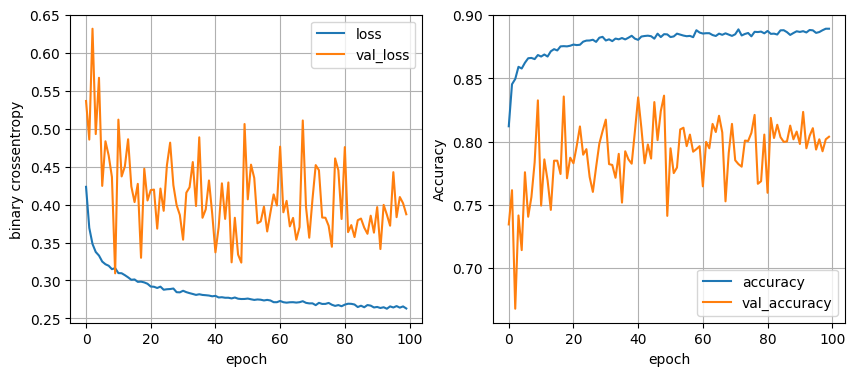

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.8785 - loss: 0.3213
[0.31373709440231323, 0.8743427991867065]
16 nodes, dropout 0, learning rate 0.005, batch size 128


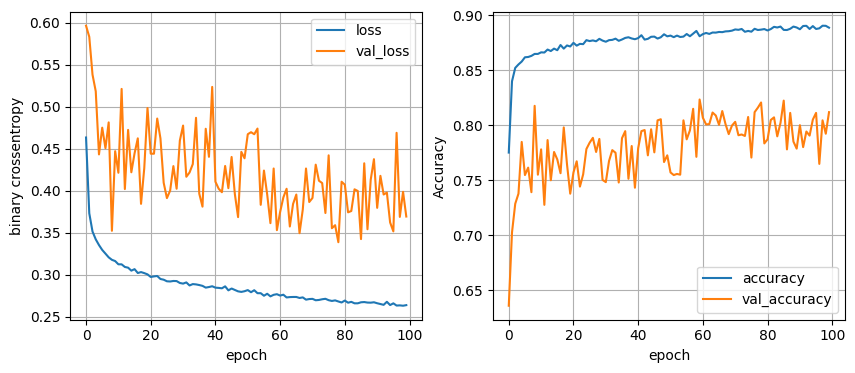

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.8745 - loss: 0.3182
[0.31561875343322754, 0.8719768524169922]
16 nodes, dropout 0, learning rate 0.001, batch size 32


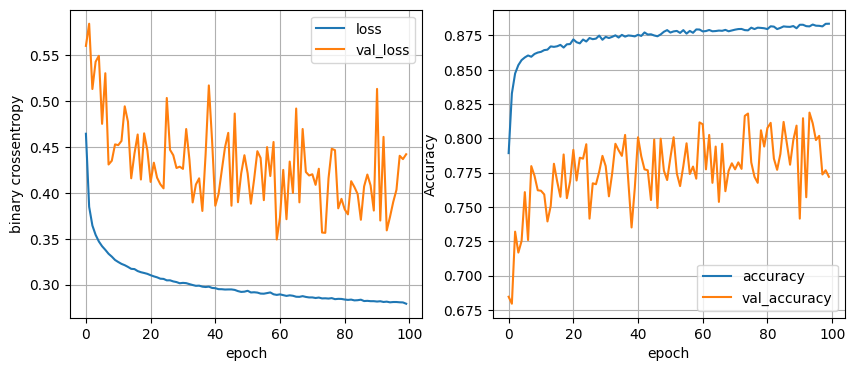

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - accuracy: 0.8776 - loss: 0.3159
[0.3102456331253052, 0.8756572008132935]
16 nodes, dropout 0, learning rate 0.001, batch size 64


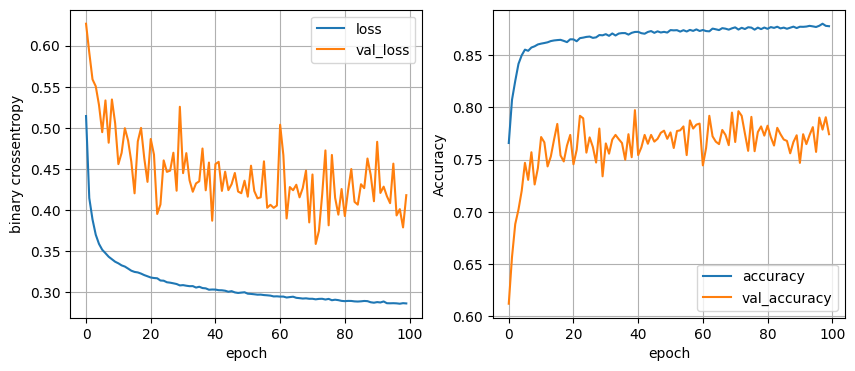

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.8748 - loss: 0.3153
[0.30929118394851685, 0.874605655670166]
16 nodes, dropout 0, learning rate 0.001, batch size 128


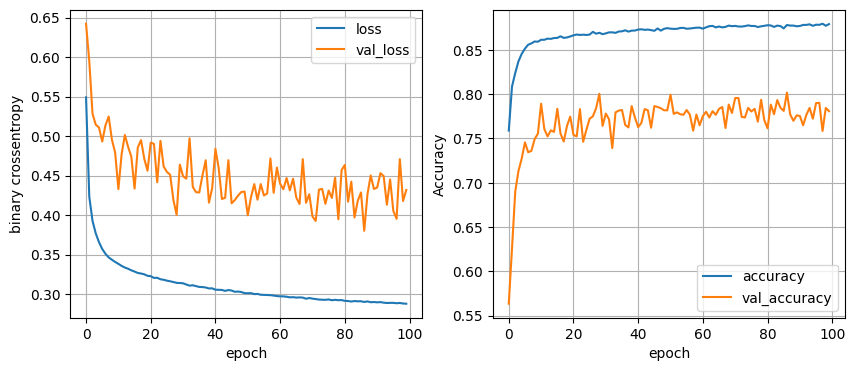

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8727 - loss: 0.3213
[0.31183046102523804, 0.8709253668785095]
16 nodes, dropout 0.2, learning rate 0.01, batch size 32


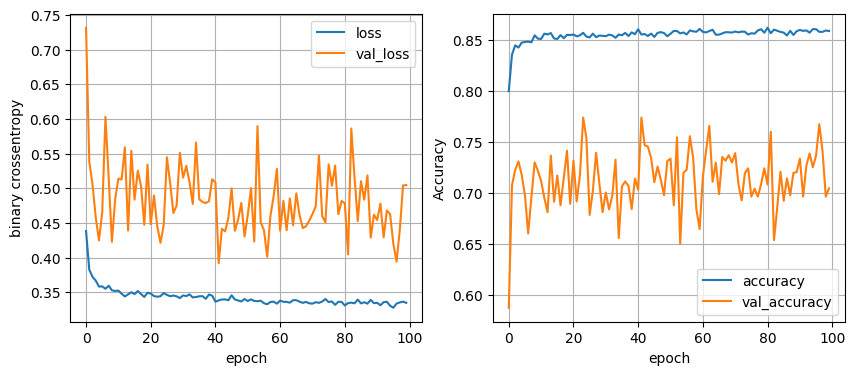

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8685 - loss: 0.3152  
[0.3166244924068451, 0.867770791053772]
16 nodes, dropout 0.2, learning rate 0.01, batch size 64


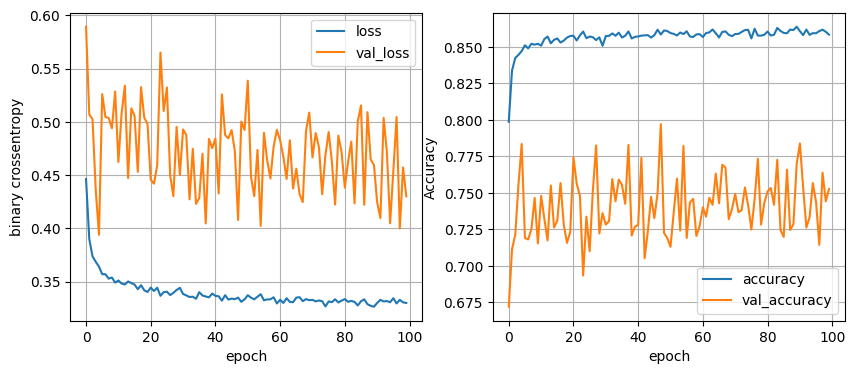

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.8646 - loss: 0.3223
[0.31915974617004395, 0.8680336475372314]
16 nodes, dropout 0.2, learning rate 0.01, batch size 128


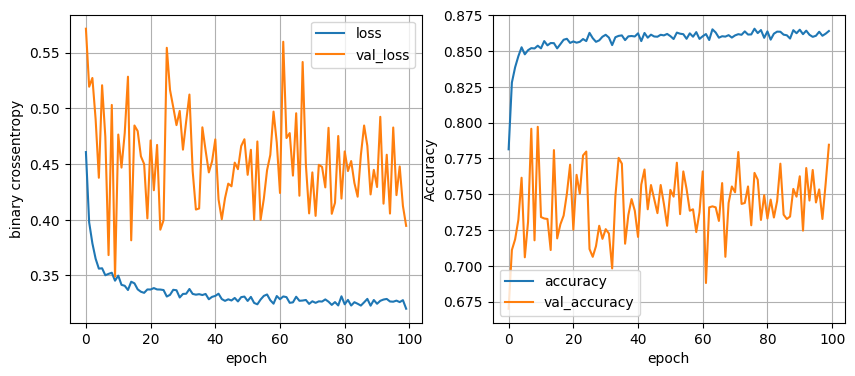

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.8751 - loss: 0.3213
[0.31203219294548035, 0.8732912540435791]
16 nodes, dropout 0.2, learning rate 0.005, batch size 32


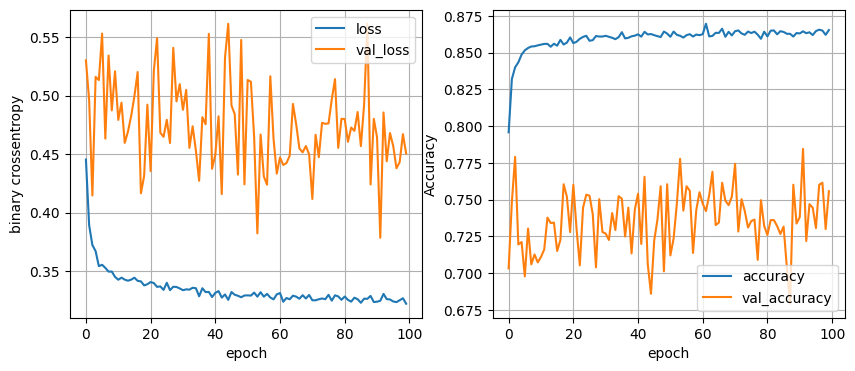

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.8757 - loss: 0.3123
[0.3142518997192383, 0.8748685717582703]
16 nodes, dropout 0.2, learning rate 0.005, batch size 64


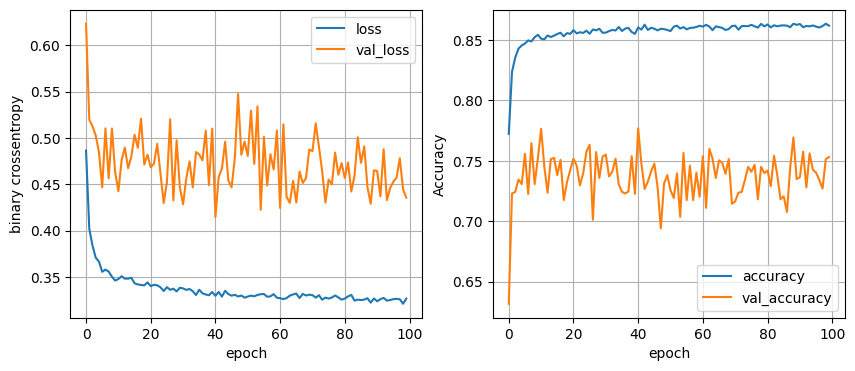

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8763 - loss: 0.3192
[0.31376269459724426, 0.8743427991867065]
16 nodes, dropout 0.2, learning rate 0.005, batch size 128


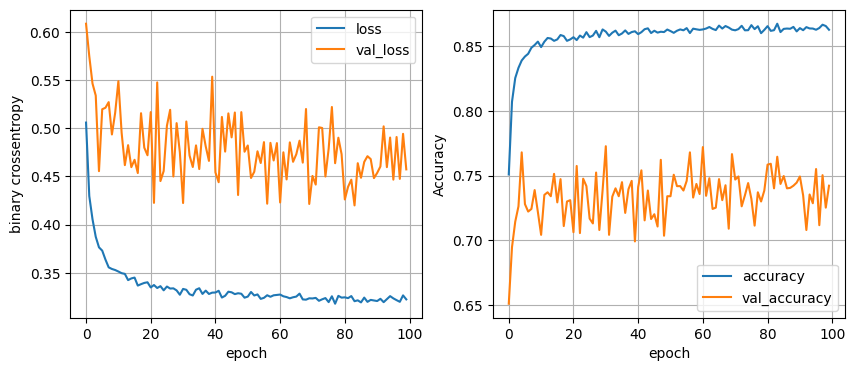

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8716 - loss: 0.3122
[0.30981573462486267, 0.8725026249885559]
16 nodes, dropout 0.2, learning rate 0.001, batch size 32


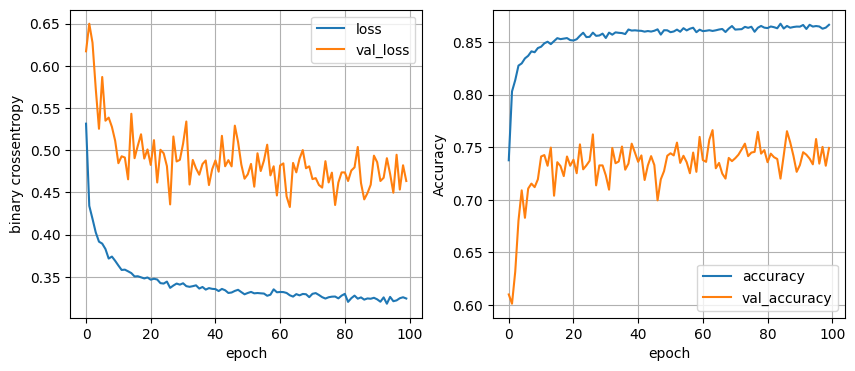

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.8751 - loss: 0.3151
[0.3113555312156677, 0.8740799427032471]
16 nodes, dropout 0.2, learning rate 0.001, batch size 64


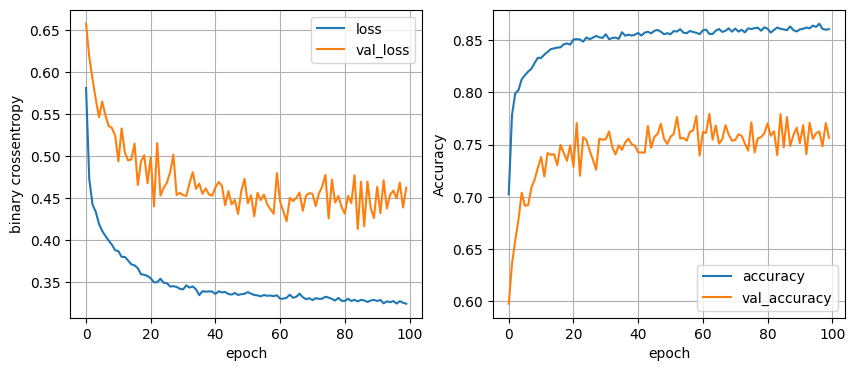

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - accuracy: 0.8779 - loss: 0.3156
[0.31035107374191284, 0.8756572008132935]
16 nodes, dropout 0.2, learning rate 0.001, batch size 128


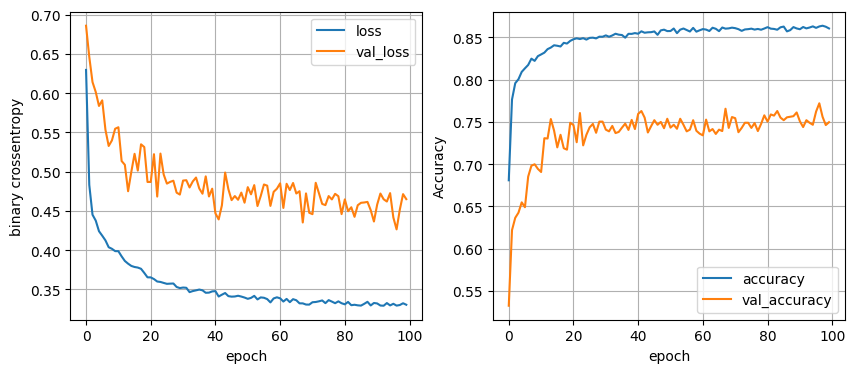

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.8763 - loss: 0.3156
[0.3100295066833496, 0.8756572008132935]
32 nodes, dropout 0, learning rate 0.01, batch size 32


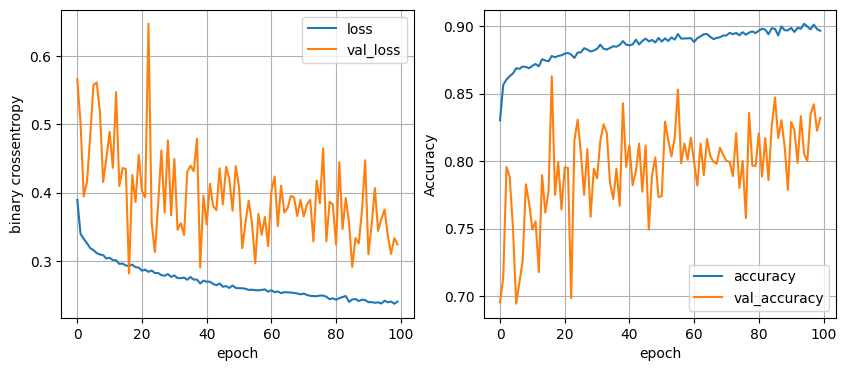

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.8677 - loss: 0.3505
[0.34784549474716187, 0.8654048442840576]
32 nodes, dropout 0, learning rate 0.01, batch size 64


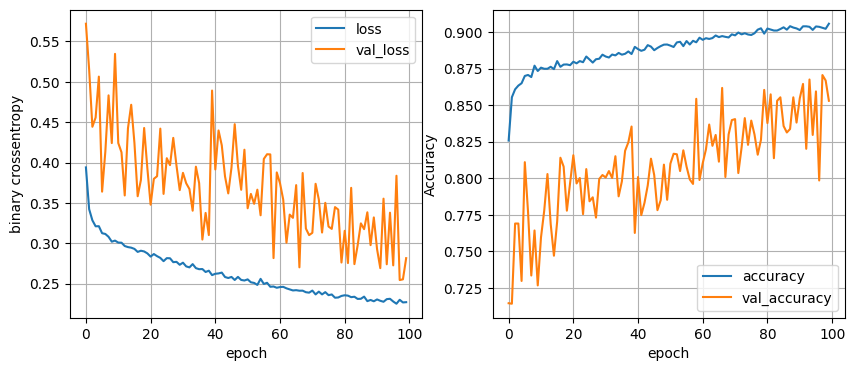

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8610 - loss: 0.3936
[0.3851015567779541, 0.8604100942611694]
32 nodes, dropout 0, learning rate 0.01, batch size 128


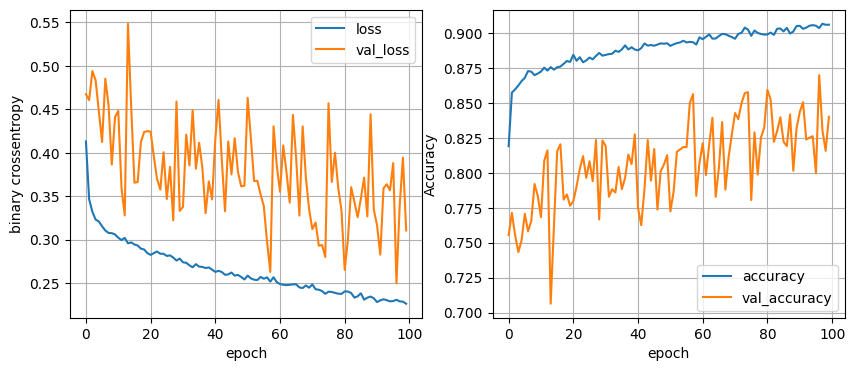

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.8755 - loss: 0.3526
[0.3546769320964813, 0.8646162152290344]
32 nodes, dropout 0, learning rate 0.005, batch size 32


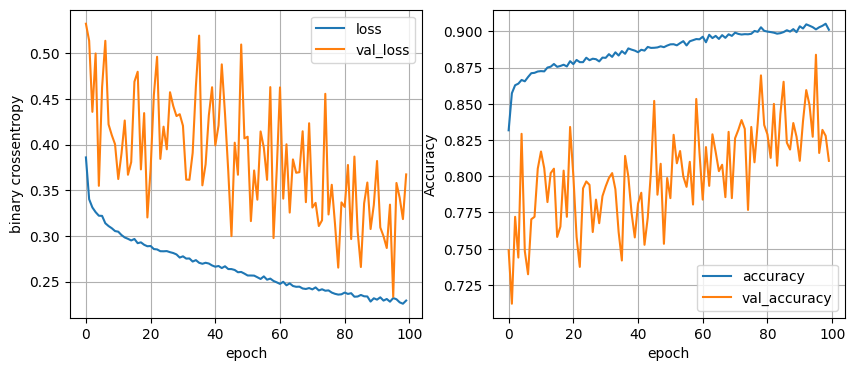

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8699 - loss: 0.3526
[0.3591156303882599, 0.8651419281959534]
32 nodes, dropout 0, learning rate 0.005, batch size 64


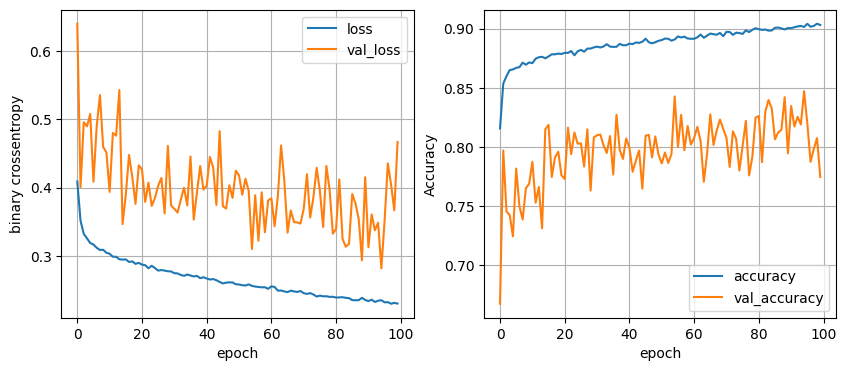

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8716 - loss: 0.3659
[0.36780720949172974, 0.8682965040206909]
32 nodes, dropout 0, learning rate 0.005, batch size 128


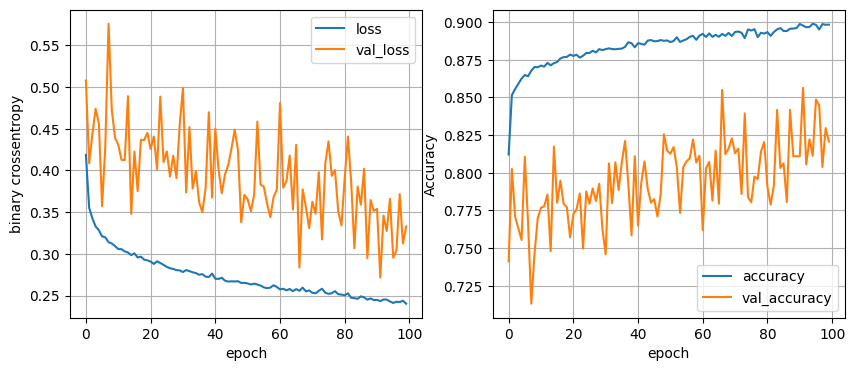

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.8725 - loss: 0.3319
[0.3289910852909088, 0.8732912540435791]
32 nodes, dropout 0, learning rate 0.001, batch size 32


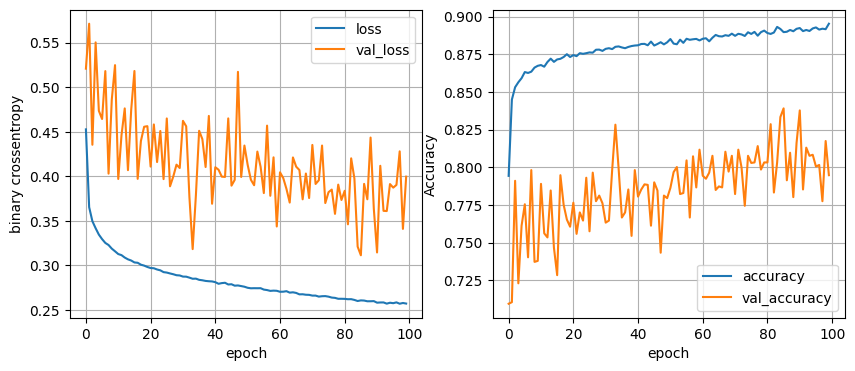

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8773 - loss: 0.3116
[0.3142716884613037, 0.8764458298683167]
32 nodes, dropout 0, learning rate 0.001, batch size 64


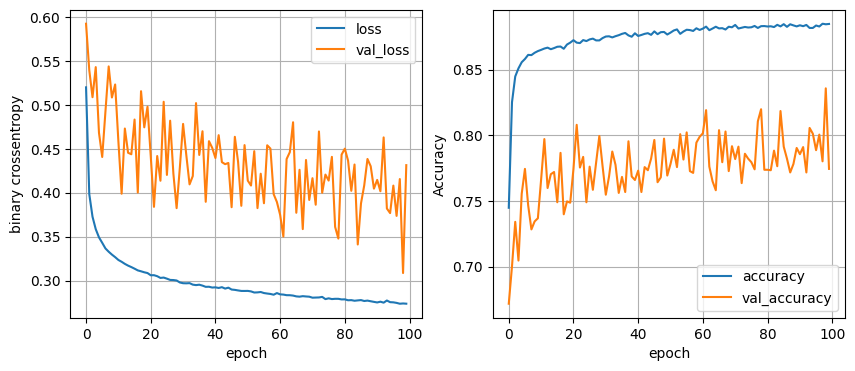

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.8749 - loss: 0.3135
[0.3092164993286133, 0.8793375492095947]
32 nodes, dropout 0, learning rate 0.001, batch size 128


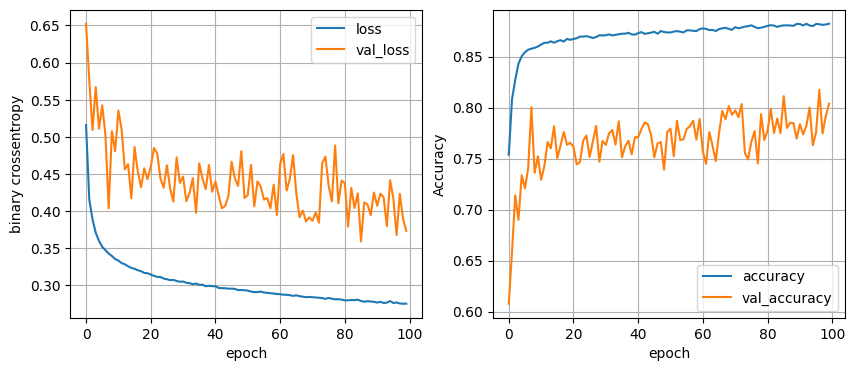

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.8723 - loss: 0.3145
[0.30855223536491394, 0.8693480491638184]
32 nodes, dropout 0.2, learning rate 0.01, batch size 32


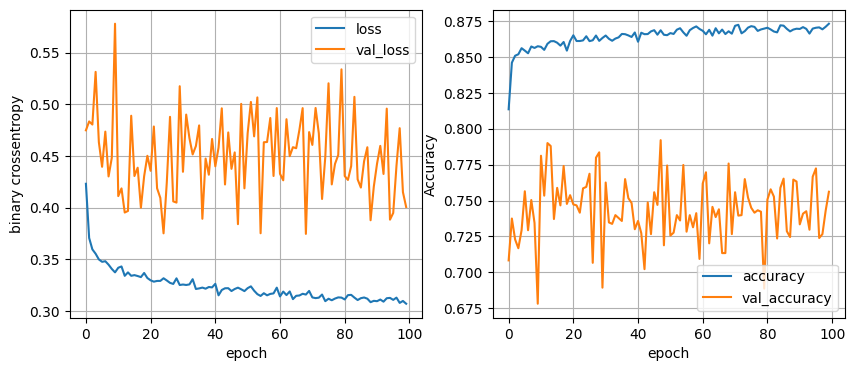

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8814 - loss: 0.3052
[0.3076882064342499, 0.8761829733848572]
32 nodes, dropout 0.2, learning rate 0.01, batch size 64


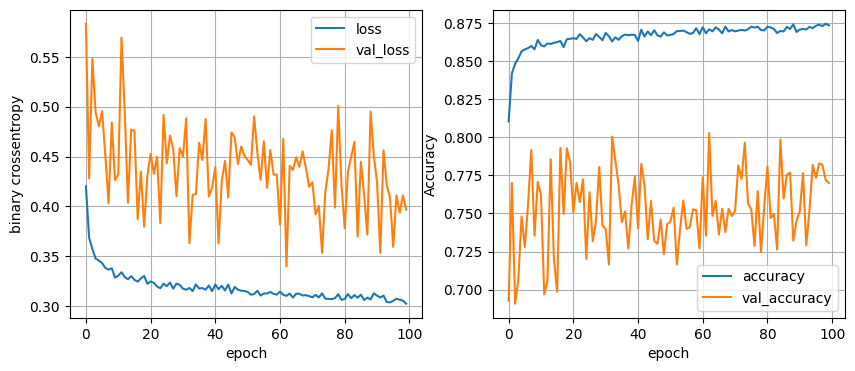

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - accuracy: 0.8805 - loss: 0.3093
[0.3087227940559387, 0.8767087459564209]
32 nodes, dropout 0.2, learning rate 0.01, batch size 128


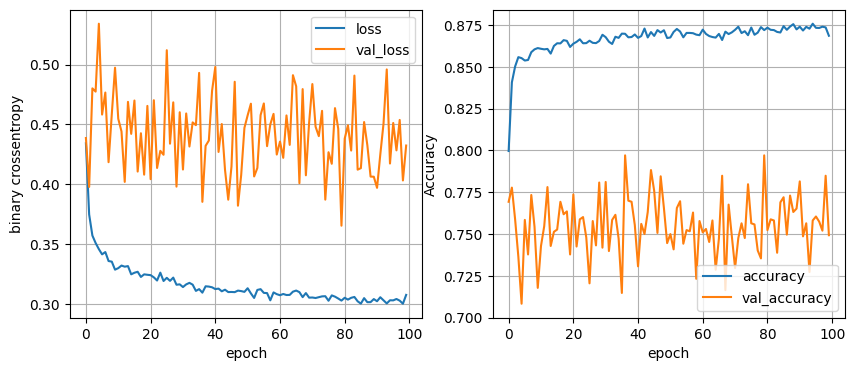

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.8768 - loss: 0.3056
[0.30144327878952026, 0.875394344329834]
32 nodes, dropout 0.2, learning rate 0.005, batch size 32


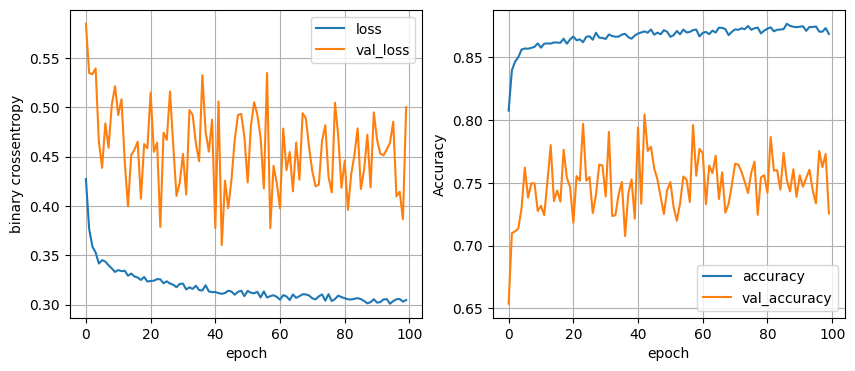

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.8767 - loss: 0.3053
[0.3105880320072174, 0.8730283975601196]
32 nodes, dropout 0.2, learning rate 0.005, batch size 64


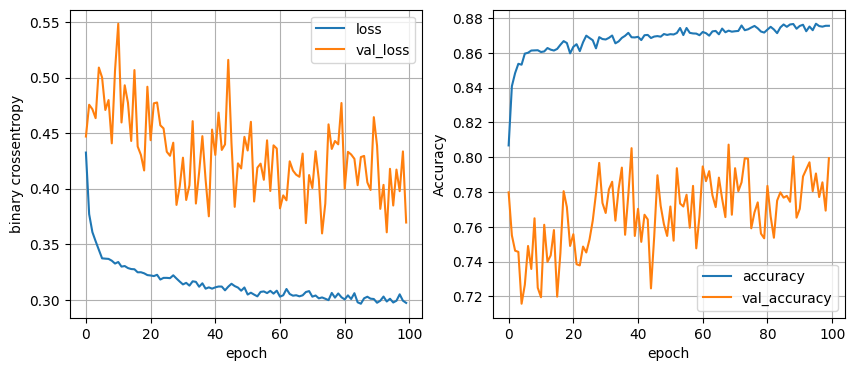

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8833 - loss: 0.3046
[0.30140095949172974, 0.8811777234077454]
32 nodes, dropout 0.2, learning rate 0.005, batch size 128


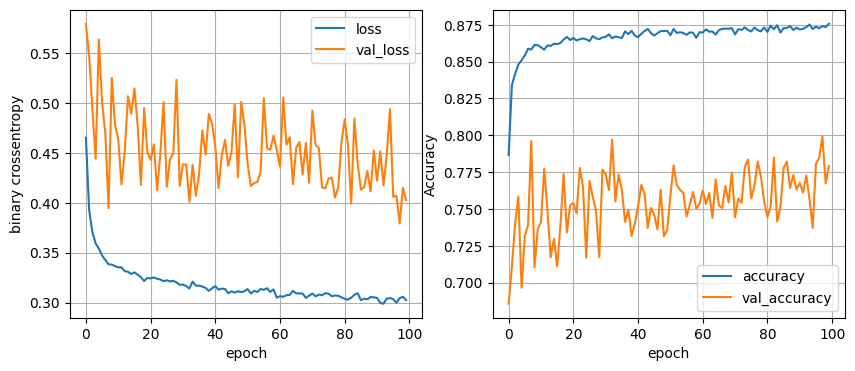

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8854 - loss: 0.3015
[0.29833170771598816, 0.8817034959793091]
32 nodes, dropout 0.2, learning rate 0.001, batch size 32


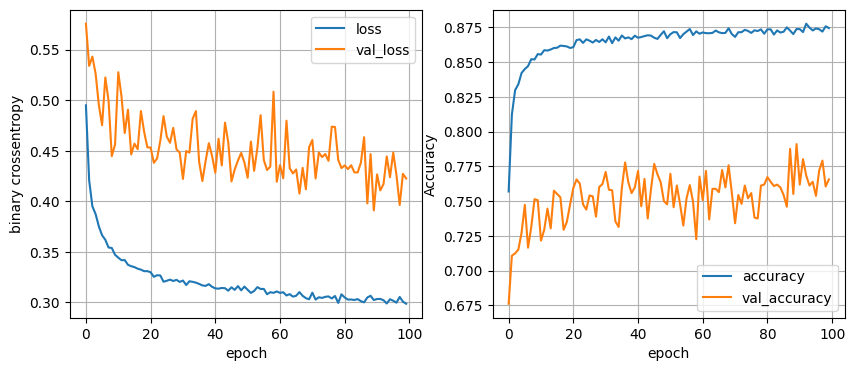

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8808 - loss: 0.2971
[0.29498055577278137, 0.8777602314949036]
32 nodes, dropout 0.2, learning rate 0.001, batch size 64


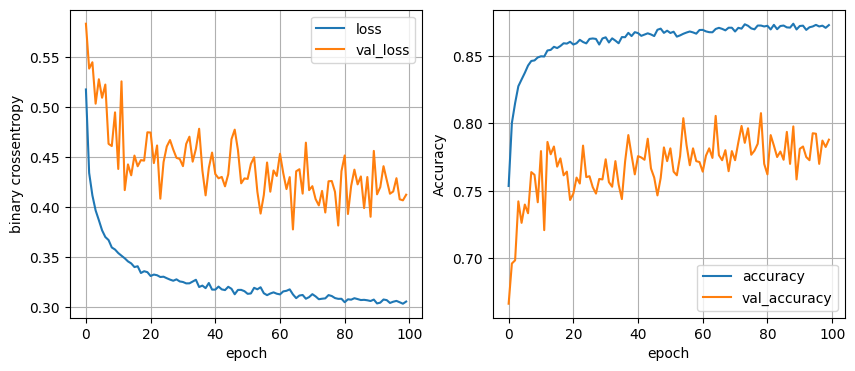

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8810 - loss: 0.3039
[0.2977546751499176, 0.8811777234077454]
32 nodes, dropout 0.2, learning rate 0.001, batch size 128


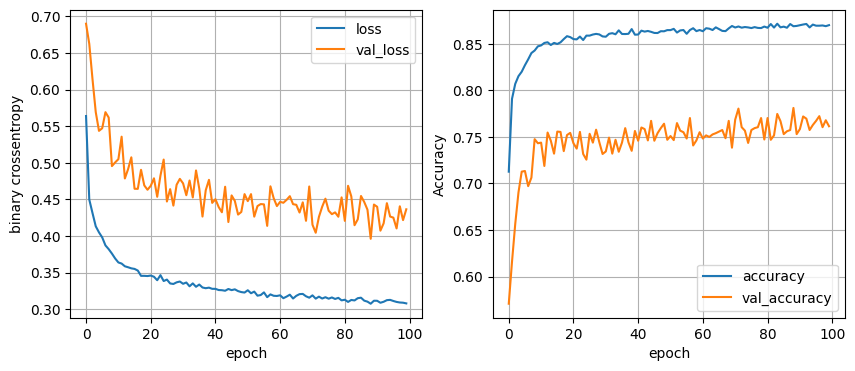

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.8794 - loss: 0.3121
[0.30278250575065613, 0.8772345185279846]
64 nodes, dropout 0, learning rate 0.01, batch size 32


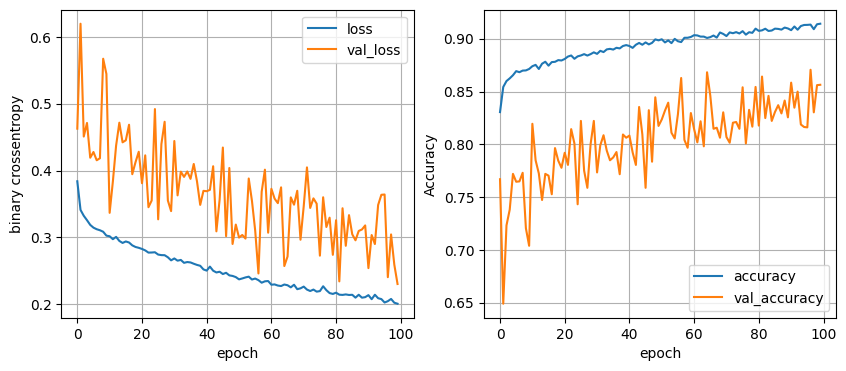

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8597 - loss: 0.4266
[0.43558213114738464, 0.8583070635795593]
64 nodes, dropout 0, learning rate 0.01, batch size 64


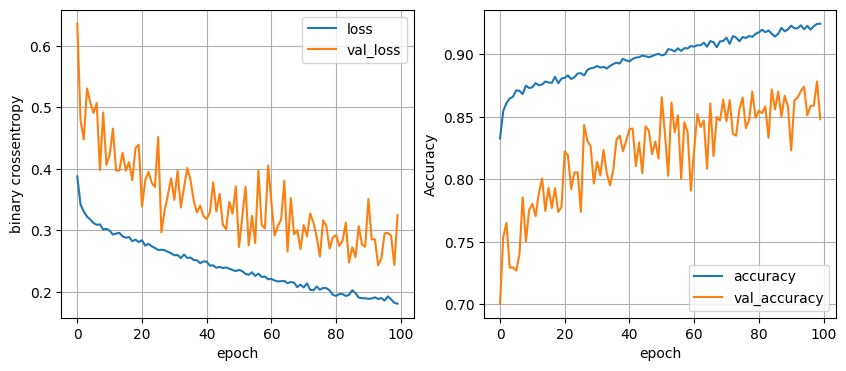

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8591 - loss: 0.4762
[0.4937959909439087, 0.8577812910079956]
64 nodes, dropout 0, learning rate 0.01, batch size 128


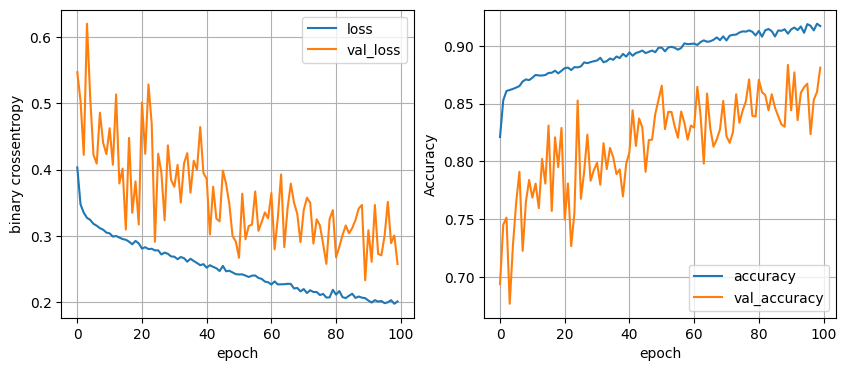

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8644 - loss: 0.4348
[0.4472675621509552, 0.8567297458648682]
64 nodes, dropout 0, learning rate 0.005, batch size 32


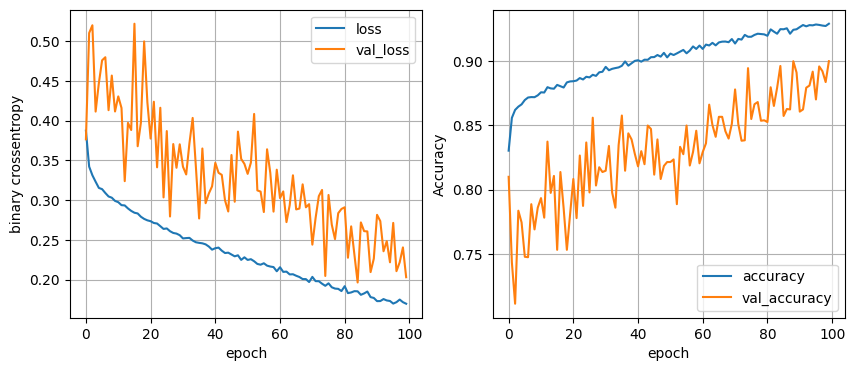

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8485 - loss: 0.4665
[0.47509029507637024, 0.8543637990951538]
64 nodes, dropout 0, learning rate 0.005, batch size 64


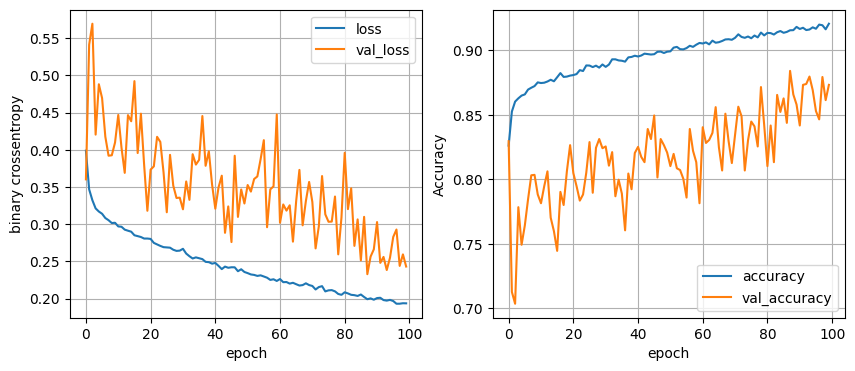

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - accuracy: 0.8693 - loss: 0.3693
[0.38987207412719727, 0.8630388975143433]
64 nodes, dropout 0, learning rate 0.005, batch size 128


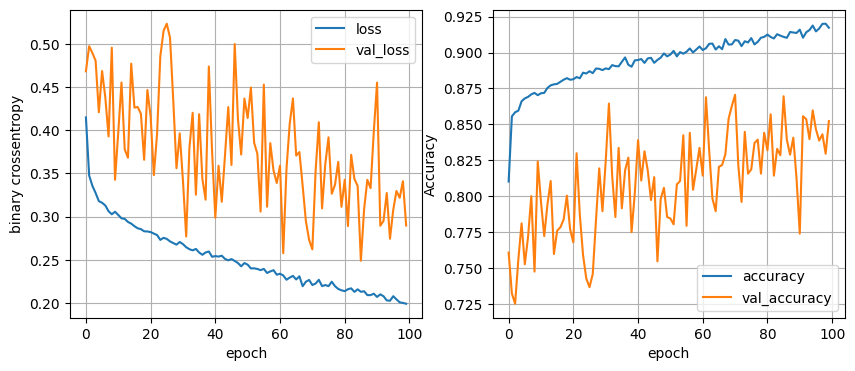

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8755 - loss: 0.3621
[0.36700162291526794, 0.8693480491638184]
64 nodes, dropout 0, learning rate 0.001, batch size 32


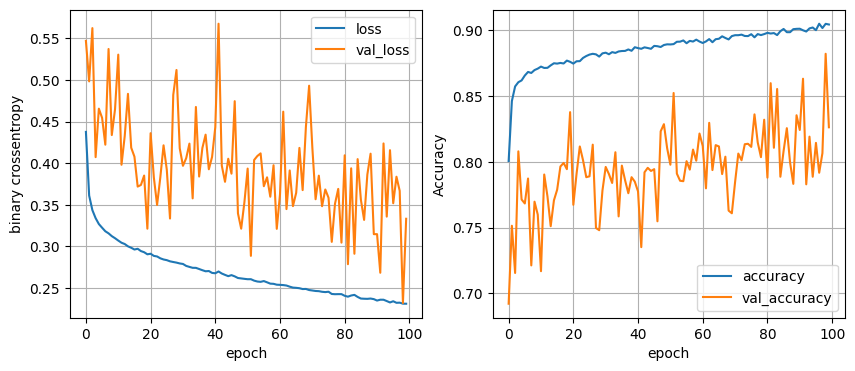

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8741 - loss: 0.3309
[0.32526519894599915, 0.8748685717582703]
64 nodes, dropout 0, learning rate 0.001, batch size 64


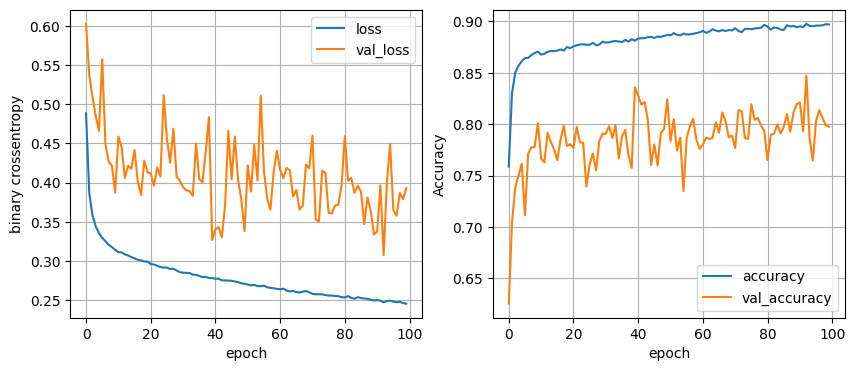

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8815 - loss: 0.3191
[0.3121357560157776, 0.8793375492095947]
64 nodes, dropout 0, learning rate 0.001, batch size 128


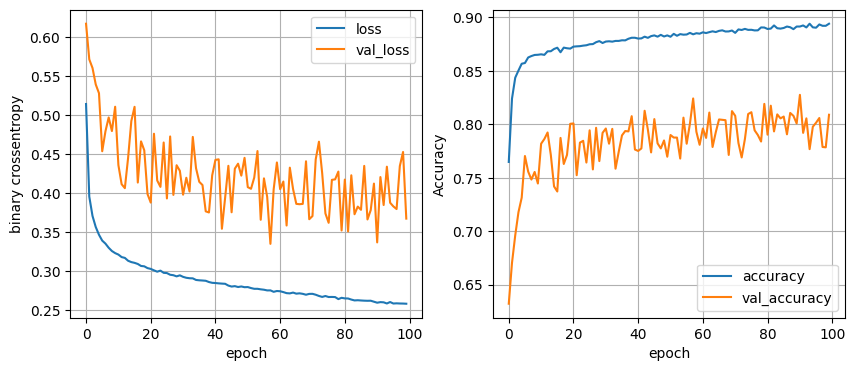

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.8707 - loss: 0.3199
[0.30964624881744385, 0.8738170266151428]
64 nodes, dropout 0.2, learning rate 0.01, batch size 32


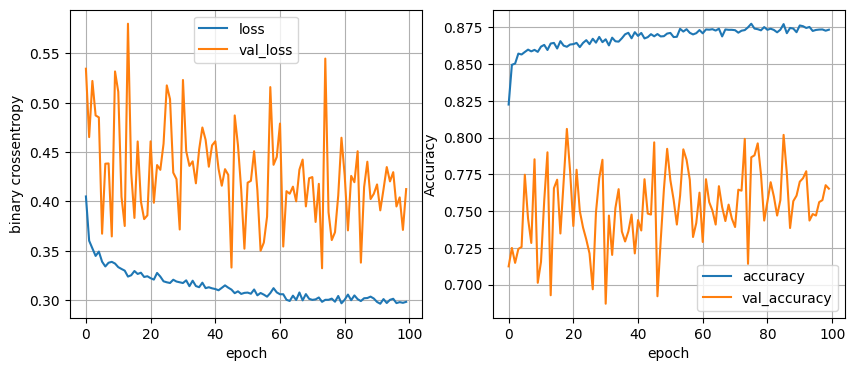

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.8787 - loss: 0.3213
[0.3189316987991333, 0.875394344329834]
64 nodes, dropout 0.2, learning rate 0.01, batch size 64


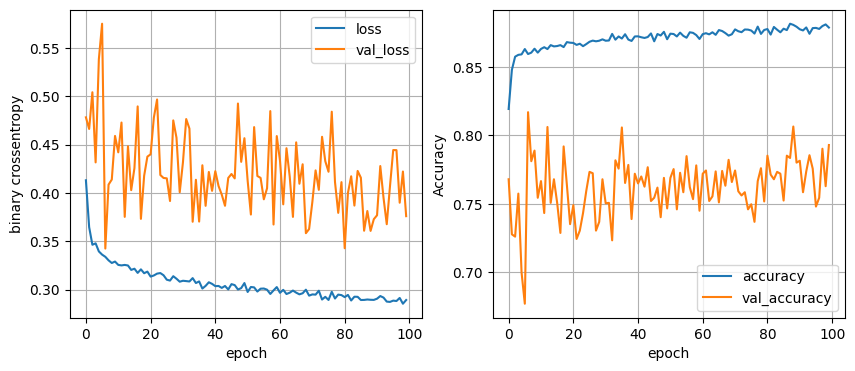

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8856 - loss: 0.3018
[0.30115753412246704, 0.8774973750114441]
64 nodes, dropout 0.2, learning rate 0.01, batch size 128


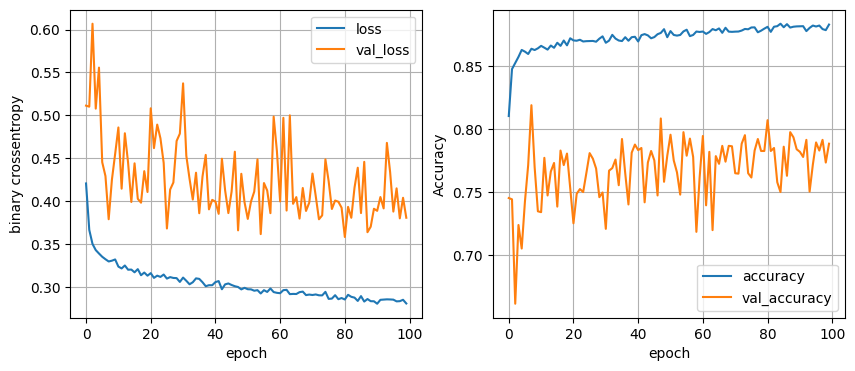

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8817 - loss: 0.2997
[0.3021988570690155, 0.8801261782646179]
64 nodes, dropout 0.2, learning rate 0.005, batch size 32


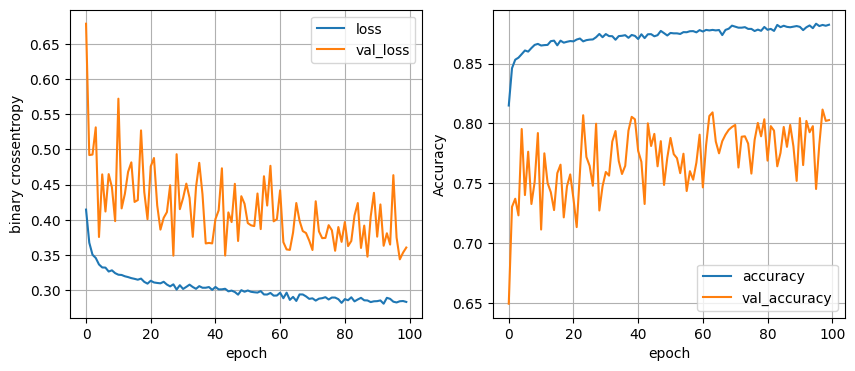

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8799 - loss: 0.3063
[0.3016197681427002, 0.8764458298683167]
64 nodes, dropout 0.2, learning rate 0.005, batch size 64


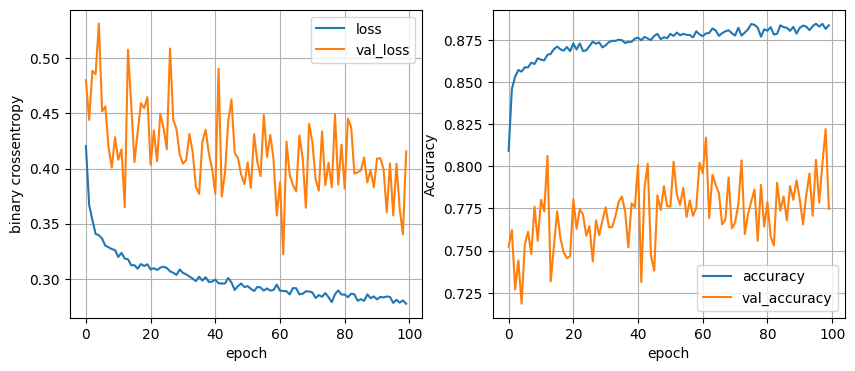

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8853 - loss: 0.3020
[0.30865079164505005, 0.883017897605896]
64 nodes, dropout 0.2, learning rate 0.005, batch size 128


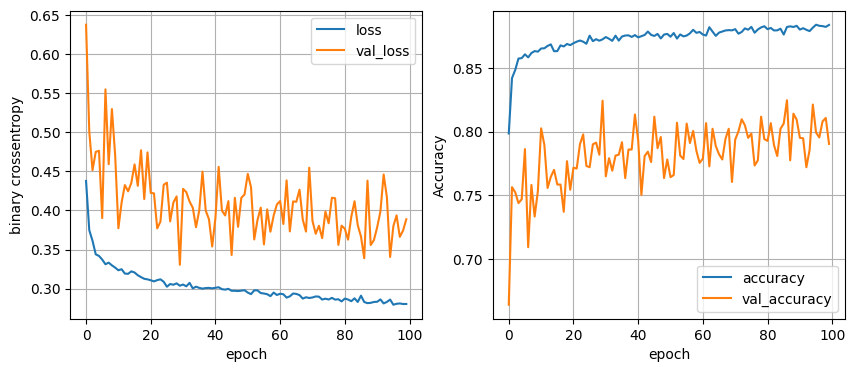

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8807 - loss: 0.3017
[0.30191752314567566, 0.8803890347480774]
64 nodes, dropout 0.2, learning rate 0.001, batch size 32


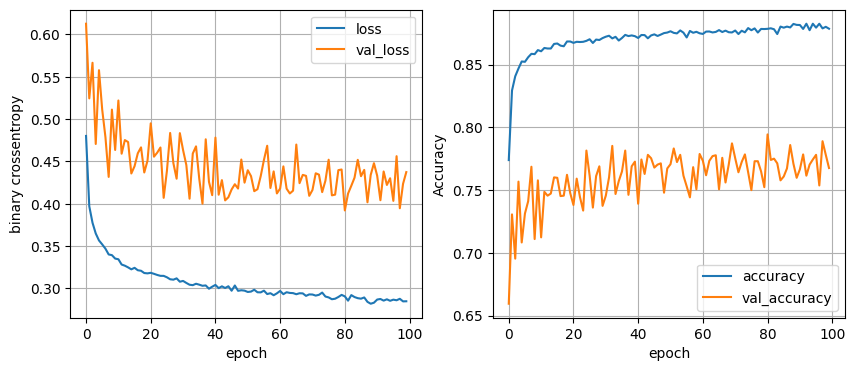

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8866 - loss: 0.2993
[0.2979549467563629, 0.8806519508361816]
64 nodes, dropout 0.2, learning rate 0.001, batch size 64


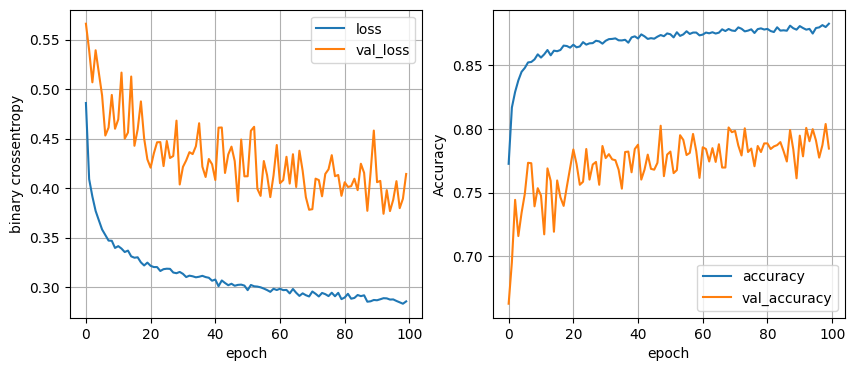

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8832 - loss: 0.2918
[0.29277098178863525, 0.8811777234077454]
64 nodes, dropout 0.2, learning rate 0.001, batch size 128


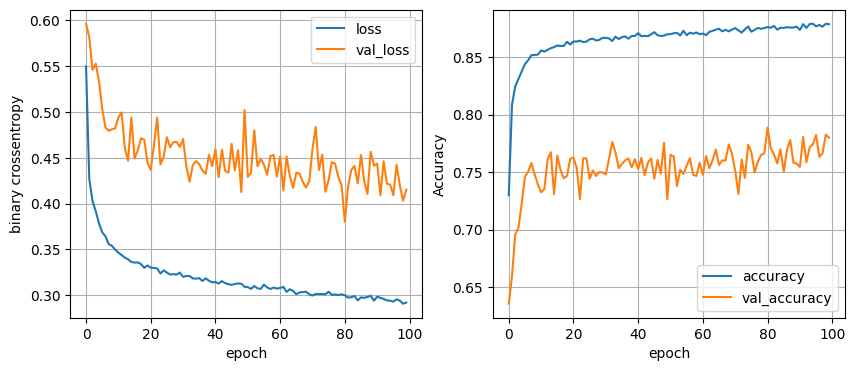

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8852 - loss: 0.2947
[0.29330646991729736, 0.8798633217811584]


In [11]:
least_val_loss=[float('inf'),float('inf')]
least_loss_model=None
epochs=100
for num_nodes in [16,32,64]:
    for dropout_prob in [0,0.2]:
        for lr in [0.01,0.005,0.001]:
            for batch_size in [32,64,128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, learning rate {lr}, batch size {batch_size}")
                model, history=train_model(x_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
                plot_history(history)
                val_loss=model.evaluate(x_valid,y_valid)
                print(val_loss)
                if val_loss < least_val_loss: 
                    least_val_loss=val_loss
                    least_loss_model=model

In [14]:
from sklearn.metrics import classification_report
y_pred =least_loss_model.predict(x_test)
y_pred=(y_pred>0.5).astype(int).reshape(-1,)
print(classification_report(y_test,y_pred))

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step
              precision    recall  f1-score   support

           0       0.86      0.75      0.80      1336
           1       0.87      0.94      0.90      2468

    accuracy                           0.87      3804
   macro avg       0.87      0.84      0.85      3804
weighted avg       0.87      0.87      0.87      3804

